# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




/tmp/ipykernel_6944/1842324635.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


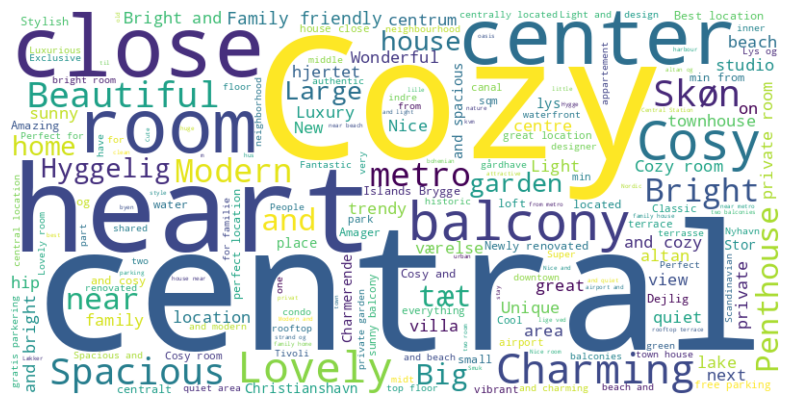

In [1]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

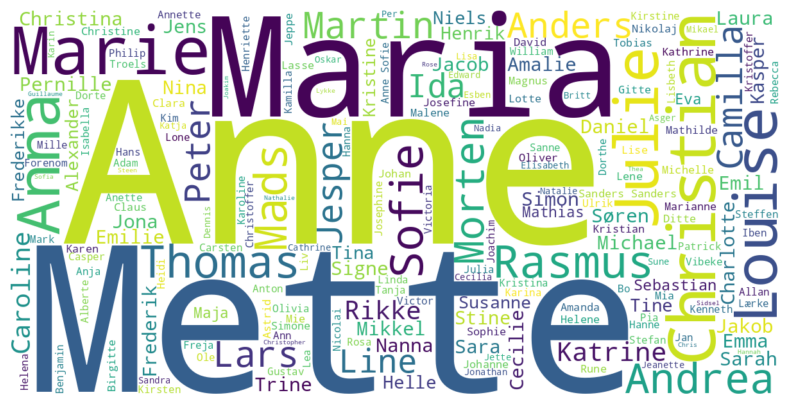

In [2]:
# State your solution here. Add more cells if needed.

# Iteratively looking at the data, certain words that are not people names were founded
# These words were then added to the stop_words list, so that they would not appear in the wordcloud

text = " ".join(data_filtered['host_name'])
stop_words = ["Apartment", 'Denmark', 'Copenhagen', 'ApartmentinCopenhagen', 'A', "Rent", "Place", "Og", "And", "&", "Into", "This"]
wordcloud = WordCloud( stopwords=stop_words, background_color="white", width=1200, height=600).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud shows more or less the same names' distribution as Danmarks Statistik's data

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

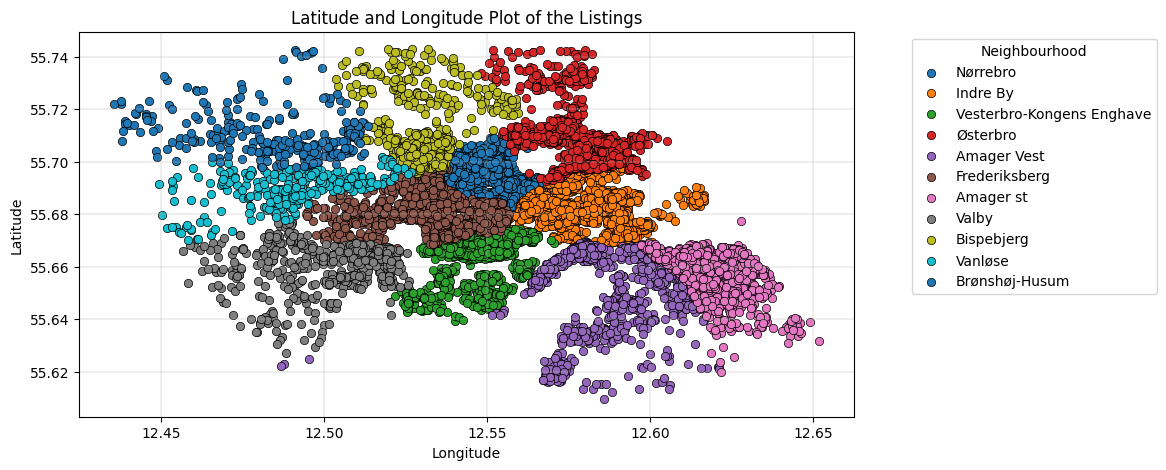

In [3]:
# State your solution here. Add more cells if needed.

# Use of scatter plot to show the location of the listings
# In order for points to be visible a border has been added to the points 
# For plot to like more like a map, a grid has been added


plt.figure(figsize=(10, 5))
# Get the unique values of the 'neighbourhood_cleansed' column
neighborhoods = data_filtered['neighbourhood_cleansed'].unique()

# In order to display points in different neighborhoods with different colors, we need to loop over the neighborhoods
# and plot poits specific to each neighborhood
for neighborhood in neighborhoods:
    neighborhood_data = data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]
    plt.scatter(neighborhood_data['longitude'], neighborhood_data['latitude'], label=neighborhood, edgecolor='black', linewidth=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Plot of the Listings')
# To know we color corresponds to which neighborhood, we add a legend and keep it outside of the grid
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.4, 1),loc='upper right')
plt.grid(True, linewidth=0.3)
plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In [4]:
# State your solution here. Add more cells if needed.
from matplotlib import ticker


# Group the data by neighborhood and get the lists of prices and ratings for each neighborhood
grouped_neighbourhood = data_filtered.groupby('neighbourhood_cleansed')['price'].apply(list)
grouped_rating = data_filtered.groupby('neighbourhood_cleansed')['review_scores_rating'].apply(list)


# Get the names of the neighborhoods, they are gonna be used as labels on the x-axis
neighborhoods = grouped_neighbourhood.index.tolist()
# Extract prices for each neighborhood
prices = grouped_neighbourhood.tolist()
# Extract ratings for each neighborhood
ratings = grouped_rating.tolist()




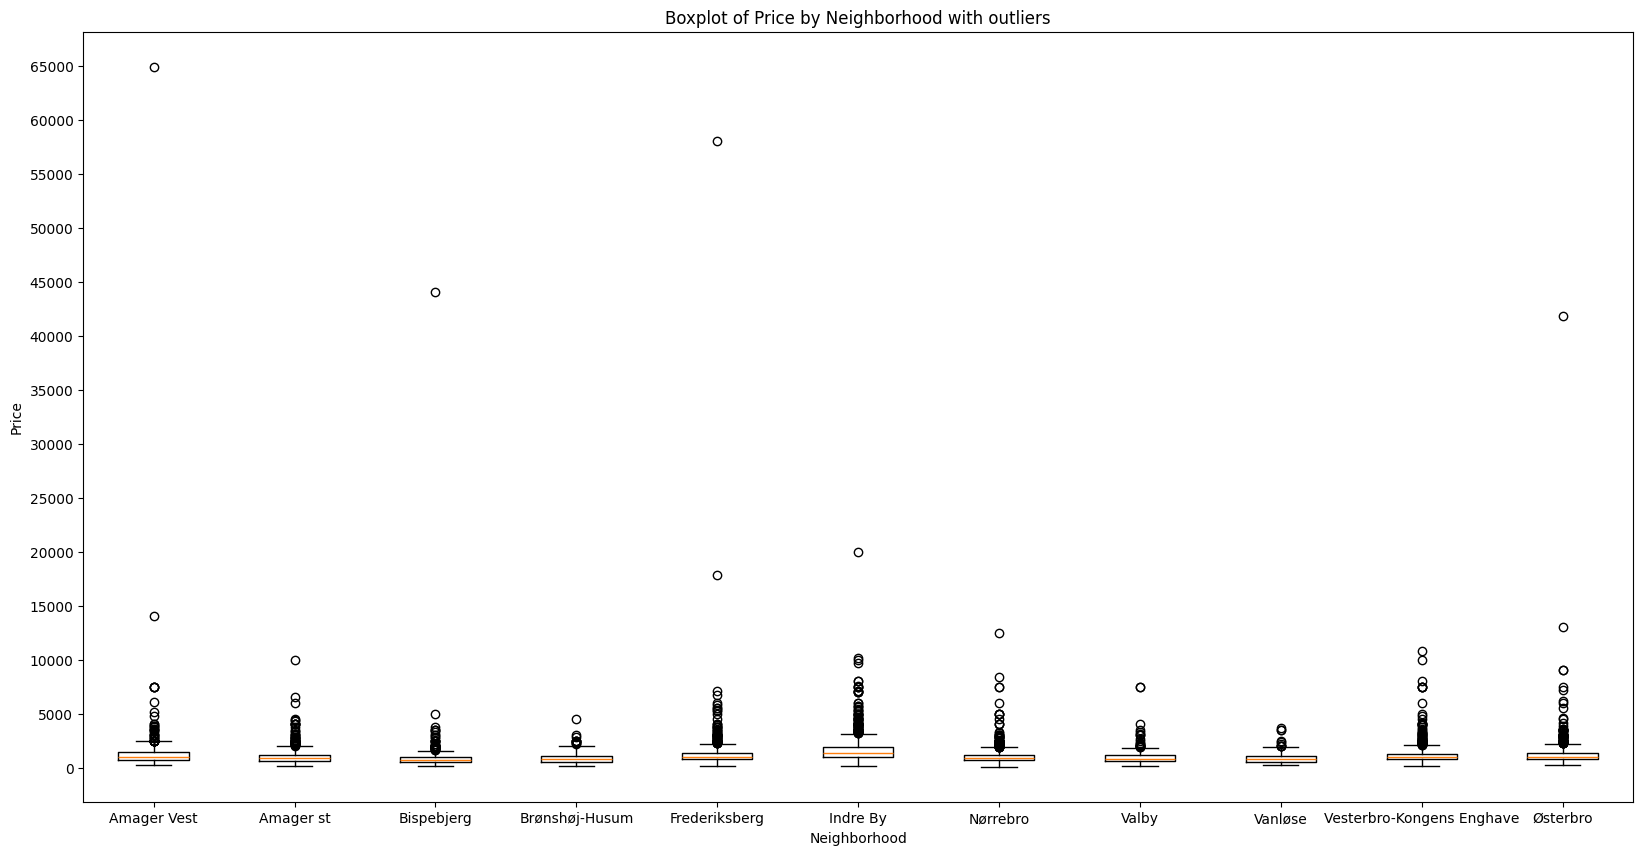

In [5]:
# Create box plot with outliers
plt.figure(figsize=(20, 10))
plt.boxplot(prices, labels=neighborhoods, showfliers=True)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
# Set the y-axis tick to appear every 5000
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.title('Boxplot of Price by Neighborhood with outliers')
plt.show()

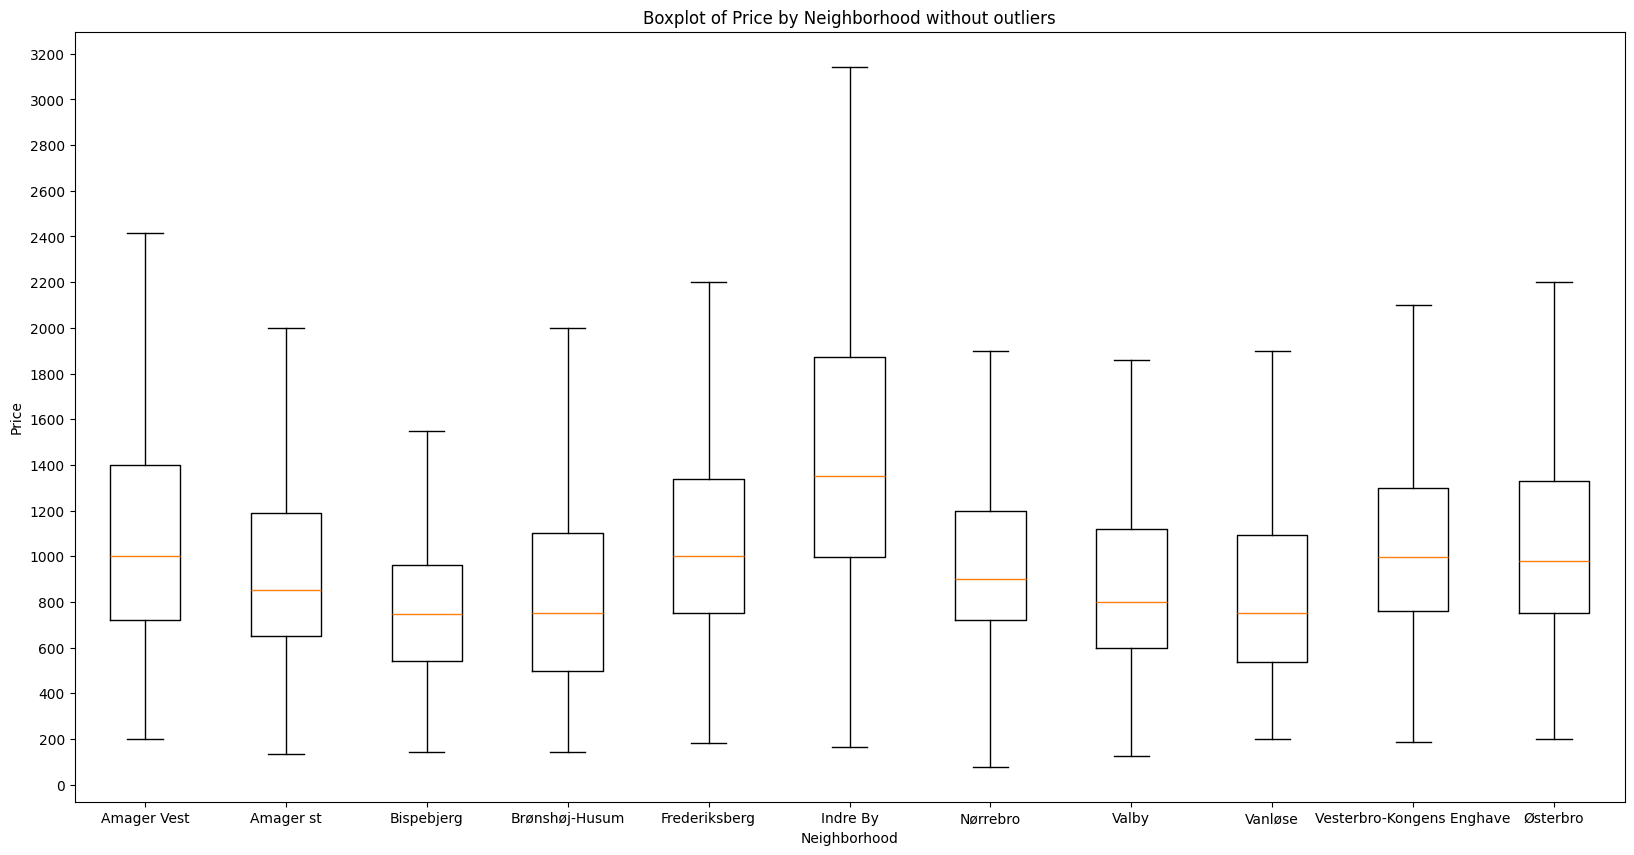

In [6]:
# Because of the outliers, the boxplot is not very informative. But it tells us that most listings are below 5000 DKK + some listings are very expensive
# Create box plot without outliers to get a better view of the distribution of prices

plt.figure(figsize=(20, 10))
plt.boxplot(prices, labels=neighborhoods, showfliers=False)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
# This time set the y-axis tick to appear every 200
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.title('Boxplot of Price by Neighborhood without outliers')
plt.show()
# It looks like the listings in the city center are more expensive than the listings in the other neighborhoods
# But the difference is not very big
# Price usually varies between 1000 and 2000 DKK
# The cheapest listings are in the neighborhood of Brønshøj-Husum

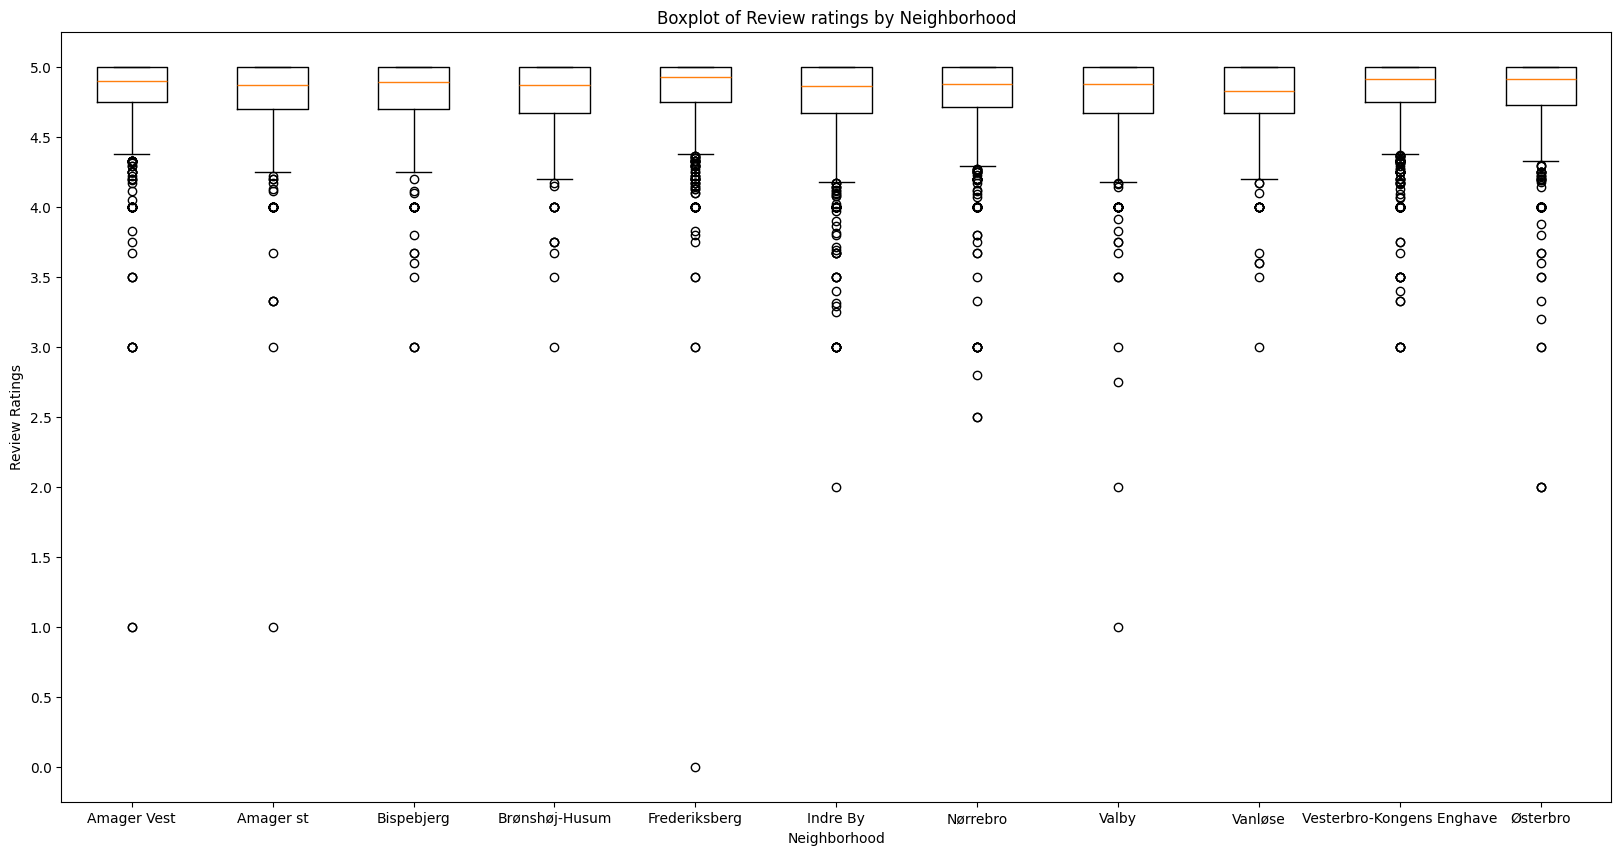

In [7]:
# Now let's plot distribution of review ratings in each neighborhood
plt.figure(figsize=(20, 10))
plt.boxplot(ratings, labels=neighborhoods, showfliers=True)
plt.xlabel('Neighborhood')
plt.ylabel('Review Ratings')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.title('Boxplot of Review ratings by Neighborhood')
plt.show()
# The plot shows that the ratings are usually very high in all neighborhoods, 
# however, the ratings in the city center are slightly lower than in the other neighborhoods
# Of course all neighbourhood have more lower bound outlier ratings, that range mostly around 3-4.5
# One listing in Frederiksberg got review with 0 rating

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [8]:
# State your solution here. Add more cells if needed.

# Get descriptive statistics for the price of the apartments grouped by neighborhood and room type
data_filtered.groupby(['neighbourhood_cleansed','room_type'])['price'].describe()


count         mean          std  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.226623   832.696891   
                          Private room      148.0  1032.966216  5299.018095   
                          Shared room         2.0  1051.500000   112.429978   
Amager st                 Entire home/apt   791.0  1093.584071   721.982284   
                          Hotel room          3.0  1296.000000   211.184753   
                          Private room      129.0   549.325581   293.995992   
                          Shared room         1.0  2575.000000          NaN   
Bispebjerg                Entire home/apt   508.0   992.592520  1981.580545   
                          Private room       95.0   488.978947   353.674089   
                          Shared room         1.0   198.000000          NaN   
Brønshøj-Husum            Entire home/apt   216.0  1014.995370   555.669548   
                          Private room       67.0   445.552239   201.631624   
                          Shared room         2.0   211.500000    16.263456   
Frederiksberg             Entire home/apt  1044.0  1292.472222  1958.802772   
                          Private room      133.0   621.706767   567.611220   
Indre By                  Entire home/apt  1702.0  1642.387192  1072.616232   
                          Hotel room         10.0  1077.200000   654.255098   
                          Private room      128.0   698.984375   380.070466   
                          Shared room         4.0   292.000000    67.577116   
Nørrebro                  Entire home/apt  1889.0  1047.742192   583.703218   
                          Private room      165.0   650.121212   760.270040   
                          Shared room         3.0   324.666667   130.481161   
Valby                     Entire home/apt   450.0  1017.968889   635.434691   
                          Private room       89.0   498.157303   288.616366   
Vanløse                   Entire home/apt   254.0   954.425197   496.658320   
                          Private room       44.0   413.409091   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.435119   698.122481   
                          Private room      221.0   574.366516   295.726896   
                          Shared room         2.0   330.500000   113.844192   
Østerbro                  Entire home/apt  1174.0  1248.551107  1438.908216   
                          Private room      130.0   605.461538   437.259030   
                          Shared room         1.0   469.000000          NaN   

                                              min      25%     50%      75%  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   814.00  1050.0  1480.00   
                          Private room      200.0   400.00   500.0   655.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   800.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brønshøj-Husum            Entire home/apt   250.0   655.75   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg             Entire home/apt   300.0   822.50  1037.0  1400.00   
                          Private room      185.0   400.00   500.0   700.00   
Indre By      

In [9]:
# Get descriptive statistics for the review ratings of the apartments grouped by neighborhood and room type
display(data_filtered.groupby(['neighbourhood_cleansed','room_type'])['review_scores_rating'].describe())


count      mean       std   min  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  4.818295  0.308978  1.00   
                          Private room      148.0  4.813108  0.262551  3.50   
                          Shared room         2.0  3.500000  0.707107  3.00   
Amager st                 Entire home/apt   791.0  4.809393  0.273629  1.00   
                          Hotel room          3.0  4.843333  0.146401  4.71   
                          Private room      129.0  4.734806  0.299466  3.00   
                          Shared room         1.0  4.000000       NaN  4.00   
Bispebjerg                Entire home/apt   508.0  4.803720  0.273271  3.00   
                          Private room       95.0  4.759789  0.322955  3.00   
                          Shared room         1.0  4.570000       NaN  4.57   
Brønshøj-Husum            Entire home/apt   216.0  4.779769  0.297106  3.00   
                          Private room       67.0  4.772687  0.282723  3.75   
                          Shared room         2.0  4.735000  0.091924  4.67   
Frederiksberg             Entire home/apt  1044.0  4.835469  0.286300  0.00   
                          Private room      133.0  4.779699  0.251631  4.00   
Indre By                  Entire home/apt  1702.0  4.779935  0.279761  2.00   
                          Hotel room         10.0  4.420000  0.397855  3.50   
                          Private room      128.0  4.700156  0.381456  3.00   
                          Shared room         4.0  4.530000  0.270924  4.28   
Nørrebro                  Entire home/apt  1889.0  4.806829  0.265048  2.50   
                          Private room      165.0  4.799212  0.233225  3.50   
                          Shared room         3.0  4.763333  0.183394  4.62   
Valby                     Entire home/apt   450.0  4.767467  0.367633  1.00   
                          Private room       89.0  4.764607  0.326879  2.75   
Vanløse                   Entire home/apt   254.0  4.776732  0.301430  3.00   
                          Private room       44.0  4.757955  0.196949  4.17   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  4.832601  0.247694  3.00   
                          Private room      221.0  4.791493  0.251403  3.00   
                          Shared room         2.0  4.925000  0.106066  4.85   
Østerbro                  Entire home/apt  1174.0  4.814114  0.297598  2.00   
                          Private room      130.0  4.793154  0.256388  4.00   
                          Shared room         1.0  5.000000       NaN  5.00   

                                              25%    50%     75%   max  
neighbourhood_cleansed    room_type                                     
Amager Vest               Entire home/apt  4.7500  4.900  5.0000  5.00  
                          Private room     4.7575  4.880  5.0000  5.00  
                          Shared room      3.2500  3.500  3.7500  4.00  
Amager st                 Entire home/apt  4.7150  4.880  5.0000  5.00  
                          Hotel room       4.7650  4.820  4.9100  5.00  
                          Private room     4.6300  4.820  4.9400  5.00  
                          Shared room      4.0000  4.000  4.0000  4.00  
Bispebjerg                Entire home/apt  4.7000  4.890  5.0000  5.00  
                          Private room     4.6600  4.880  5.0000  5.00  
                          Shared room      4.5700  4.570  4.5700  4.57  
Brønshøj-Husum            Entire home/apt  4.6700  4.875  5.0000  5.00  
                          Private room     4.6750  4.860  5.0000  5.00  
                          Shared room      4.7025  4.735  4.7675  4.80  
Frederiksberg             Entire home/apt  4.7675  4.940  5.0000  5.00  
                          Private room     4.6700  4.830  5.0000  5.00  
Indre By                  Entire home/apt  4.6700  4.860  5.0000  5.00  
                          Hotel room       

In [10]:

# Create new tmp column with rounded review scores
# This new column is categorical as it has only finite number of classes (0-5) 
data_filtered['review_scores_rating_rounded'] = data_filtered['review_scores_rating'].round(0).astype('category')
# Now we can display the number of listings in each neighborhood and room type with each review score
display(data_filtered.groupby(['neighbourhood_cleansed','room_type'])['review_scores_rating_rounded'].value_counts().unstack())

# Drop the column 'review_scores_rating_rounded' to get back the data to its original state
data_filtered = data_filtered.drop(columns=['review_scores_rating_rounded'])

review_scores_rating_rounded               0.0  1.0  2.0  3.0  4.0   5.0
neighbourhood_cleansed    room_type                                     
Amager Vest               Entire home/apt    0    2    0    4   74   829
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    0   14   134
                          Shared room        0    0    0    1    1     0
Amager st                 Entire home/apt    0    1    0    3   84   703
                          Hotel room         0    0    0    0    0     3
                          Private room       0    0    0    1   21   107
                          Shared room        0    0    0    0    1     0
Bispebjerg                Entire home/apt    0    0    0    2   66   440
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    1   14    80
                          Shared room        0    0    0    0    0     1
Brønshøj-Husum            Entire home/apt    0    0    0    1   31   184
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    0    9    58
                          Shared room        0    0    0    0    0     2
Frederiksberg             Entire home/apt    1    0    0    2  102   939
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    0   18   115
                          Shared room        0    0    0    0    0     0
Indre By                  Entire home/apt    0    0    1    9  218  1474
                          Hotel room         0    0    0    0    6     4
                          Private room       0    0    0    3   22   103
                          Shared room        0    0    0    0    2     2
Nørrebro                  Entire home/apt    0    0    2    9  203  1675
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    0   16   149
                          Shared room        0    0    0    0    0     3
Valby                     Entire home/apt    0    1    1    1   68   379
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    1   12    76
                          Shared room        0    0    0    0    0     0
Vanløse                   Entire home/apt    0    0    0    1   31   222
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    0    5    39
                          Shared room        0    0    0    0    0     0
Vesterbro-Kongens Enghave Entire home/apt    0    0    0    7  156  1648
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    1   22   198
                          Shared room        0    0    0    0    0     2
Østerbro                  Entire home/apt    0    0    3    4  124  1043
                          Hotel room         0    0    0    0    0     0
                          Private room       0    0    0    0   16   114
                          Shared room        0    0    0    0    0     1

### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Drop columns that that are not relevant for the model (few iterations were run to find the best combination of columns)

# Most of them were dropped because they are not relevant for the model
# Price was dropped because it is used to create the target variable and if it was used it would be a data leakage

drop_cols = [
    "id",
    "name",
    "host_id"  ,
    "host_name" , 
    "price"  ,
    "last_review",
    ]

df = data_filtered.drop(drop_cols, axis=1)

In [12]:
# Split data into features and target variable
X = df.drop('price_category', axis=1)
y = df['price_category']

# One-hot encode the categorical text columns
X = pd.get_dummies(X, columns=['neighbourhood_cleansed', 'room_type'], dtype=float, drop_first=True)




In [13]:
# Look at the correlation matrix to find if some features are correlated with each other
X.corr()

,latitude,longitude,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,neighbourhood_cleansed_Frederiksberg,neighbourhood_cleansed_Indre By,neighbourhood_cleansed_Nørrebro,neighbourhood_cleansed_Valby,neighbourhood_cleansed_Vanløse,neighbourhood_cleansed_Vesterbro-Kongens Enghave,neighbourhood_cleansed_Østerbro,room_type_Hotel room,room_type_Private room,room_type_Shared room
latitude,1.000000,-0.253636,0.012581,-0.040586,-0.003473,-0.010268,-0.023200,0.007522,0.001422,-0.024196,...,0.019047,0.017071,0.290612,-0.215466,0.067033,-0.349243,0.455934,-0.014934,-0.028972,0.008171
longitude,-0.253636,1.000000,0.001935,0.064648,-0.000735,0.005890,0.000772,-0.009882,-0.012776,0.147180,...,-0.244194,0.286919,-0.108608,-0.370685,-0.324018,-0.125303,0.208076,0.029603,-0.045324,0.005574
minimum_nights,0.012581,0.001935,1.000000,-0.015214,-0.012399,-0.012323,-0.019342,-0.001747,0.001664,0.001050,...,0.001605,0.001336,0.010183,-0.006537,-0.003164,-0.001138,0.000641,-0.006586,-0.000888,-0.005676
number_of_reviews,-0.040586,0.064648,-0.015214,1.000000,-0.037330,-0.003268,0.032713,0.014649,-0.009317,-0.014333,...,-0.033935,0.129520,-0.036298,-0.030362,0.002841,0.011937,-0.045600,0.038582,0.188859,0.052263
review_scores_rating,-0.003473,-0.000735,-0.012399,-0.037330,1.000000,0.673052,0.651202,0.481213,0.558967,0.389923,...,0.029091,-0.047989,0.003404,-0.028176,-0.016835,0.038340,0.009984,-0.033096,-0.037869,-0.036586
review_scores_accuracy,-0.010268,0.005890,-0.012323,-0.003268,0.673052,1.000000,0.562195,0.514815,0.561207,0.350422,...,0.025540,-0.031276,-0.001099,-0.029252,-0.012207,0.020392,-0.008209,-0.014072,-0.021108,-0.051674
review_scores_cleanliness,-0.023200,0.000772,-0.019342,0.032713,0.651202,0.562195,1.000000,0.357789,0.380951,0.279001,...,0.020884,-0.016047,-0.004298,-0.032120,-0.007146,0.042067,-0.006724,-0.006634,0.011203,-0.014875
review_scores_checkin,0.007522,-0.009882,-0.001747,0.014649,0.481213,0.514815,0.357789,1.000000,0.599503,0.262342,...,0.017476,-0.038664,0.003699,-0.022703,0.010745,0.008811,0.002173,-0.012258,-0.008845,-0.027532
review_scores_communication,0.001422,-0.012776,0.001664,-0.009317,0.558967,0.561207,0.380951,0.599503,1.000000,0.333908,...,0.017950,-0.055955,0.018891,-0.031427,0.011194,0.026158,-0.008090,-0.019604,-0.037355,-0.031006
review_scores_location,-0.024196,0.147180,0.001050,-0.014333,0.389923,0.350422,0.279001,0.262342,0.333908,1.000000,...,0.043346,0.177083,0.058774,-0.132460,-0.088270,0.066052,-0.021680,0.005031,-0.077068,-0.030808


In [14]:
# From correlation matrix, we can see that features related to reviews are corelated with each other.
# Therefore, we drop them, not to confuse model + the accuraccy of the model is higher without them
drop_cols = [
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ]

X = X.drop(drop_cols, axis=1)

In [15]:
# Split the data into a training set and a validation set and a test set
# We stratify the data to ensure that the training and validation and test sets have the same proportion of each class as the original dataset
# Random state is set to ensure reproducibility of the results for assessment purposes
X_rest, X_test, y_rest, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=132)
X_train, X_val, y_train, y_val = train_test_split(X_rest,y_rest,test_size=0.2, stratify=y_rest, random_state=132)




In [16]:
from sklearn.preprocessing import StandardScaler

# Logical regression model converges faster if the data is scaled
# Standard scaler is used to scale the data
scaler = StandardScaler()


# Scaler is fit only on training data, because we want to avoid data leakage
X_train = scaler.fit_transform(X_train)

# Rest of the data is transformed
X_rest = scaler.transform(X_rest)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)



In [17]:
# Manual hyperparameter tuning for logistic regression
# Evaluate model on validation set
# Keep track of the best model and its hyperparameters
# Of course more options could have been tried

param_grid = {
    'C': [ 0.01, 0.1, 1, 10, 100 ],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear',  'lbfgs', 'newton-cg'],
}

best_params = {}
best_acc = 0
for c in param_grid['C']:
    for p in param_grid['penalty']:
        for s in param_grid['solver']:
            # Some regularization methods do not work with some solvers so we need to catch the exception
            # and continue to the next iteration
            try:
                lr = LogisticRegression(C=c, penalty=p, solver=s, max_iter=1000)
                lr.fit(X_train, y_train)
                score = lr.score(X_val, y_val)
                if score > best_acc:
                    best_acc = score
                    print(f'New best accuracy: {best_acc}')
                    best_params = {'C': c, 'penalty': p, 'solver': s}
            except BaseException as e:
                continue


print(best_acc)
best_params


New best accuracy: 0.6809278350515464
New best accuracy: 0.6814432989690722


New best accuracy: 0.6845360824742268
New best accuracy: 0.6850515463917526
0.6850515463917526


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [18]:
# Use the best hyperparameters to train the model
# Train the model on combined training and validation set
# Evaluate the model on the test set


lr = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], max_iter=1000)
lr.fit(X_rest,y_rest)


lr.score(X_test, y_test)

0.6805441055234954

In [19]:
# Manual hyperparameter tuning for KNN
# Evaluate model on validation set
# Keep track of the best model and its hyperparameters
# Of course more options could have been tried

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15,17,19],
    'metric': ['euclidean', 'manhattan', "minkowski", "chebyshev" ],
}

best_params = {}
best_acc = 0

for k in param_grid['n_neighbors']:
    for m in param_grid['metric']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(X_train, y_train)
        if knn.score(X_val, y_val) > best_acc:
            best_acc = knn.score(X_val, y_val)
            print(f'New best accuracy: {best_acc}')
            best_params = {'n_neighbors': k, 'metric': m}

best_params

New best accuracy: 0.6608247422680412
New best accuracy: 0.6670103092783505
New best accuracy: 0.6757731958762887
New best accuracy: 0.6778350515463918
New best accuracy: 0.6783505154639176
New best accuracy: 0.6824742268041237
New best accuracy: 0.6876288659793814
New best accuracy: 0.6912371134020618
New best accuracy: 0.6932989690721649
New best accuracy: 0.6969072164948453


{'n_neighbors': 19, 'metric': 'manhattan'}

In [20]:
# Use the best hyperparameters to train the model
# Train the model on combined training and validation set
# Evaluate the model on the test set
knn = KNeighborsClassifier(metric=best_params['metric'], n_neighbors=best_params['n_neighbors'])
knn.fit(X_rest,y_rest)

knn.score(X_test, y_test)

0.6966199505358615

In [21]:
# Conclusions

# Both models achieve quite similar accuracy on the test set (around 0.66-0.7)
# For both of the models the test accuracy is lower than the validation accuracy, which means that the models are not overfitting
# For this use-case optimizing hyperparameters does not seem to have a big impact on the accuracy of the model (it has some but it's not huge)
# Accuracy around 0.7 is not very great, but it's not terrible either, especially given that the dataset is quite small
# Accuracy could have been improved by finding even better combination of features or by using more advanced models
# Currently the models might be slightly underfitting, because the test accuracy is very close or little bit higher than the validation accuracy
# If the price would be kept as a feature, the accuracy would be above 0.95 (but it would be a data leakage because target is created from median of price) 
# so the metric would be useless

In [22]:
# another observation 
# correlation between features and target variable

correlation = X.corrwith(y)

correlation

# it is visible that whether the listing is in Indre By or is a private room are the features that have the biggest correlation with the price category


latitude                                           -0.049633
longitude                                           0.126647
minimum_nights                                     -0.028704
number_of_reviews                                  -0.068309
review_scores_rating                                0.063941
reviews_per_month                                  -0.033830
calculated_host_listings_count                      0.077517
availability_365                                    0.167253
neighbourhood_cleansed_Amager st                   -0.054468
neighbourhood_cleansed_Bispebjerg                  -0.116564
neighbourhood_cleansed_Brønshøj-Husum              -0.051586
neighbourhood_cleansed_Frederiksberg                0.020048
neighbourhood_cleansed_Indre By                     0.219902
neighbourhood_cleansed_Nørrebro                    -0.072797
neighbourhood_cleansed_Valby                       -0.062645
neighbourhood_cleansed_Vanløse                     -0.052068
neighbourhood_cleansed_V